In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = yf.Ticker('BTC-USD').history('2y','1d')
data.shape


(731, 7)

In [ ]:
useful_data = data['Close']
useful_data.head()

Date
2020-04-09    7302.089355
2020-04-10    6865.493164
2020-04-11    6859.083008
2020-04-12    6971.091797
2020-04-13    6845.037598
Name: Close, dtype: float64

In [ ]:
n=60

In [ ]:
train=np.array(useful_data.iloc[:data.shape[0]-n]).reshape(-1,1)
test=np.array(useful_data.iloc[data.shape[0]-n:]).reshape(-1,1)
train.shape,test.shape

((671, 1), (60, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#scaler.fit(train)
#train_scaled = scaler.transform(train)
#test_scaled = scaler.transform(test)
train_max=train.max()
test_max=test.max()
print(train_max,test_max)
train_scaled=train/train_max
test_scaled=test/test_max
print(train_scaled.max(),test_scaled.max())


67566.828125 47465.73046875
1.0 1.0


In [ ]:
train_scaled[:10]

array([[0.10807211],
       [0.10161041],
       [0.10151554],
       [0.10317329],
       [0.10130767],
       [0.10126904],
       [0.0983043 ],
       [0.10532985],
       [0.10502468],
       [0.10741462]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=n
n_features=1
generator=TimeseriesGenerator(train_scaled,train_scaled,length=n_input,batch_size=n_features)

In [ ]:
X,y=generator[0]
print(f'given array : {X.flatten()}')
print(f'predict this : {y}')


given array : [0.10807211 0.10161041 0.10151554 0.10317329 0.10130767 0.10126904
 0.0983043  0.10532985 0.10502468 0.10741462 0.10640465 0.1018541
 0.1018299  0.10533582 0.10996113 0.11175456 0.11203628 0.11366328
 0.11537616 0.11554573 0.13025679 0.128148   0.13119998 0.13303269
 0.13168398 0.13190873 0.1332469  0.13717917 0.14728409 0.14567305
 0.14199122 0.12959659 0.12730797 0.13030769 0.13719731 0.14406066
 0.13805883 0.13878132 0.14312851 0.14395489 0.14399134 0.14094167
 0.13441154 0.13590363 0.13629894 0.13009887 0.13182407 0.13076021
 0.13588055 0.14098266 0.13970056 0.1435677  0.1400252  0.15047722
 0.14104264 0.14292099 0.14505101 0.14305146 0.14287602 0.1444326 ]
predict this : [[0.14461962]]


In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(50,input_shape=(n_input,1),return_sequences=True))
model.add(tf.keras.layers.LSTM(80,return_sequences=True))
model.add(tf.keras.layers.LSTM(100,return_sequences=True))
model.add(tf.keras.layers.LSTM(120,return_sequences=False))

model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 60, 80)            41920     
                                                                 
 lstm_10 (LSTM)              (None, 60, 100)           72400     
                                                                 
 lstm_11 (LSTM)              (None, 120)               106080    
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 230,921
Trainable params: 230,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5, restore_best_weights=True)

In [ ]:
model.fit(generator,epochs=50,verbose=2,callbacks=[earlystopper])

Epoch 1/50
611/611 - 33s - loss: 0.0124 - 33s/epoch - 53ms/step
Epoch 2/50
611/611 - 25s - loss: 0.0049 - 25s/epoch - 40ms/step
Epoch 3/50
611/611 - 25s - loss: 0.0035 - 25s/epoch - 40ms/step
Epoch 4/50
611/611 - 24s - loss: 0.0025 - 24s/epoch - 40ms/step
Epoch 5/50
611/611 - 24s - loss: 0.0019 - 24s/epoch - 40ms/step
Epoch 6/50
611/611 - 24s - loss: 0.0019 - 24s/epoch - 40ms/step
Epoch 7/50
611/611 - 24s - loss: 0.0015 - 24s/epoch - 40ms/step
Epoch 8/50
611/611 - 24s - loss: 0.0013 - 24s/epoch - 40ms/step
Epoch 9/50
611/611 - 24s - loss: 0.0013 - 24s/epoch - 40ms/step
Epoch 10/50
611/611 - 24s - loss: 0.0012 - 24s/epoch - 40ms/step
Epoch 11/50
611/611 - 25s - loss: 0.0020 - 25s/epoch - 40ms/step
Epoch 12/50
611/611 - 25s - loss: 9.7158e-04 - 25s/epoch - 40ms/step
Epoch 13/50
611/611 - 25s - loss: 0.0012 - 25s/epoch - 40ms/step
Epoch 14/50
611/611 - 25s - loss: 0.0013 - 25s/epoch - 40ms/step
Epoch 15/50
611/611 - 25s - loss: 9.6007e-04 - 25s/epoch - 40ms/step
Epoch 16/50
611/611 - 25s 

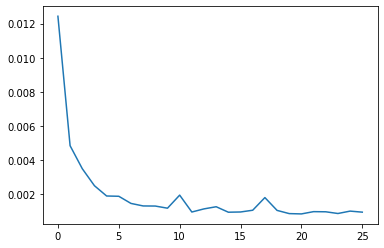

In [ ]:
plt.plot(model.history.history['loss'])

In [ ]:
last_train_batch=train_scaled[-n_input:].reshape(-1,n_input,1)
last_train_batch.shape

(1, 60, 1)

In [ ]:
model.predict(last_train_batch)

array([[0.69289666]], dtype=float32)

In [ ]:
test_scaled[0]

array([0.93412229])

In [ ]:
test_pred=[]
curr_batch=last_train_batch.reshape(-1,n_input,1)
for i in range(len(test_scaled)-1):
  curr_pred=model.predict(curr_batch)[0]

  test_pred.append(curr_pred)

  curr_batch=np.append(curr_batch[:,1:,:],[[test_scaled[i+1]]],axis=1)


In [ ]:
#true_pred=scaler.inverse_transform(test_pred)
true_pred = np.array(test_pred)*test_max

In [ ]:
print('Actual',test[0])
print('Pred  ',true_pred[0])
print('Diff    ',true_pred[0]-test[0])

Actual [44338.796875]
Pred   [32888.848]
Diff     [-11449.94921875]


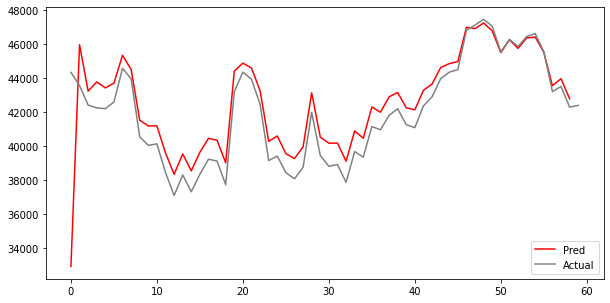

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(true_pred,label='Pred',color='red')
plt.plot(test,label='Actual',color='gray')
plt.legend()

In [ ]:
model.predict(test_scaled.reshape(-1,60,1))*test_max
model_pred=[43007.465]
test.tail()

array([[43007.465]], dtype=float32)